In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, Conv2D, Dense
from keras.callbacks import ModelCheckpoint, History
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
data = mnist.load_data()
data[0][1].shape
data[0][0].shape

(60000, 28, 28)

2

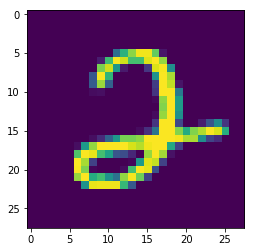

In [3]:
plt.imshow(data[0][0][16])
data[0][1][16]

In [4]:
images = data[0][0]
labels = data[0][1]

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
len(set(labels))

10

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [78]:
mod = Sequential()
mod.add(Convolution2D(32, (3, 3), input_shape = (28, 28, 1)))
mod.add(Convolution2D(64, (3, 3)))
mod.add(MaxPooling2D())
mod.add(Flatten())
mod.add(Dense(30, activation='relu'))
mod.add(Dense(10, activation='softmax'))

In [79]:
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 30)                276510    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                310       
Total params: 295,636
Trainable params: 295,636
Non-trainable params: 0
_________________________________________________________________


In [39]:
from keras import layers

In [55]:
from keras.layers import MaxPooling2D, Dropout, Flatten

In [72]:
from keras.optimizers import Adadelta

In [81]:
mod.compile(loss= keras.losses.categorical_crossentropy, optimizer='Adadelta', metrics=['accuracy'])

In [82]:
mod.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 172s - loss: 1.4098 - acc: 0.8290 - val_loss: 0.2348 - val_acc: 0.9500
Epoch 2/25
60000/60000 [==============================] - 176s - loss: 0.1939 - acc: 0.9561 - val_loss: 0.1975 - val_acc: 0.9572
Epoch 3/25
60000/60000 [==============================] - 179s - loss: 0.1291 - acc: 0.9692 - val_loss: 0.1531 - val_acc: 0.9678
Epoch 4/25
60000/60000 [==============================] - 180s - loss: 0.0975 - acc: 0.9761 - val_loss: 0.1201 - val_acc: 0.9735
Epoch 5/25
60000/60000 [==============================] - 184s - loss: 0.0750 - acc: 0.9806 - val_loss: 0.1140 - val_acc: 0.9758
Epoch 6/25
60000/60000 [==============================] - 182s - loss: 0.0588 - acc: 0.9852 - val_loss: 0.1531 - val_acc: 0.9681
Epoch 7/25
60000/60000 [==============================] - 184s - loss: 0.0479 - acc: 0.9877 - val_loss: 0.1339 - val_acc: 0.9737
Epoch 8/25
60000/60000 [=======================

8


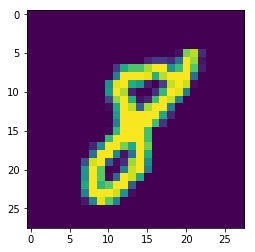

In [86]:
print(np.argmax(mod.predict(images[17].reshape(1, 28, 28, 1))))
plt.imshow(images[17])

In [166]:
def predict(path):
    image = preproc(path)
    print("Распознано: ", np.argmax(mod.predict(img2.reshape(1, 28, 28, 1))))
    print("Среди меток класса: ",mod.predict(img2.reshape(1, 28, 28, 1)) )
    plt.imshow(image)

In [109]:
mod.save('C:/Users/User/image_model.h5')

In [150]:
def preproc(path):
    img = mpimg.imread(path)
    img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2])/ 3
    img[img == 1] = 5
    img[img == 0] = 255
    img[img == 5] = 0
    return img

Распознано:  2
Среди меток класса:  [[ 0.14707889  0.03071784  0.23478012  0.06481688  0.04633336  0.06078963
   0.07876595  0.11491689  0.1413299   0.08047058]]


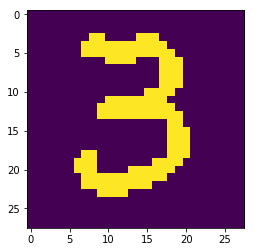

In [167]:
predict('3.png')

In [195]:
mod.predict(images[321].reshape(1, 28, 28, 1))

array([[  6.54492939e-34,   2.70818977e-38,   4.09457376e-33,
          1.00000000e+00,   4.30684352e-37,   8.56913820e-29,
          0.00000000e+00,   1.76358336e-24,   2.85984371e-28,
          2.27391943e-33]], dtype=float32)